<a href="https://colab.research.google.com/github/NeoRedcraft/dl-project-1/blob/main/jupyter_notebook/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction to the Problem

hello world

# Section 2: Dataset Description

[Provide a brief description of the dataset]





## Section 2.1 : Source of the dataset
[State the source of the dataset and how it was collected.]

In [ ]:
import os
import zipfile

# Clone the GitHub repository where the dataset is stored
!git clone https://github.com/NeoRedcraft/dl-project-1

# Define the path to the cloned repository
repo_path = 'dl-project-1' # This should match the directory name from cloning

# Define the path to the raw data directory within the repository
raw_data_path = os.path.join(repo_path, 'data/raw')

# List of zip files to extract
zip_files_to_extract = [
    'Age_Related_Macular_Degeneration.zip',
    'Hypertensive_Retinopathy.zip',
    'Normal_Fundus.zip',
    'Pathological_Myopia.zip'
]

# Define the directory where you want to extract the contents
extract_dir_base = os.path.join(repo_path, 'extracted_data') # Base directory for extraction

# Iterate through each zip file and extract it
for zip_file_name in zip_files_to_extract:
    zip_file_path = os.path.join(raw_data_path, zip_file_name)
    # Create a dedicated extraction directory for each zip file
    extract_dir = os.path.join(extract_dir_base, os.path.splitext(zip_file_name)[0])

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted {zip_file_name} to: {extract_dir}")
    except FileNotFoundError:
        print(f"Error: Zip file not found at {zip_file_path}")
    except zipfile.BadZipFile:
        print(f"Error: Could not open or read the zip file at {zip_file_path}. It might be corrupted.")
    except Exception as e:
        print(f"An error occurred during extraction {zip_file_name}: {e}")



Cloning into 'dl-project-1'...
remote: Enumerating objects: 5825, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 5825 (delta 16), reused 19 (delta 3), pack-reused 5780 (from 2)
Receiving objects: 100% (5825/5825), 215.66 MiB | 35.87 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (5769/5769), done.
Filtering content: 100% (4/4), 1.57 GiB | 32.19 MiB/s, done.
Successfully extracted Age_Related_Macular_Degeneration.zip to: dl-project-1/extracted_data/Age_Related_Macular_Degeneration
Successfully extracted Hypertensive_Retinopathy.zip to: dl-project-1/extracted_data/Hypertensive_Retinopathy
Successfully extracted Normal_Fundus.zip to: dl-project-1/extracted_data/Normal_Fundus
Successfully extracted Pathological_Myopia.zip to: dl-project-1/extracted_data/Pathological_Myopia


## Section 2.2: Dataset Structure
[Explain the dataset structure (number of images, labels, categories)]

Count for 'Age_Related_Macular_Degeneration': 7412
Count for 'Hypertensive_Retinopathy': 6224
Count for 'Normal_Fundus': 13438
Count for 'Pathological_Myopia': 5833


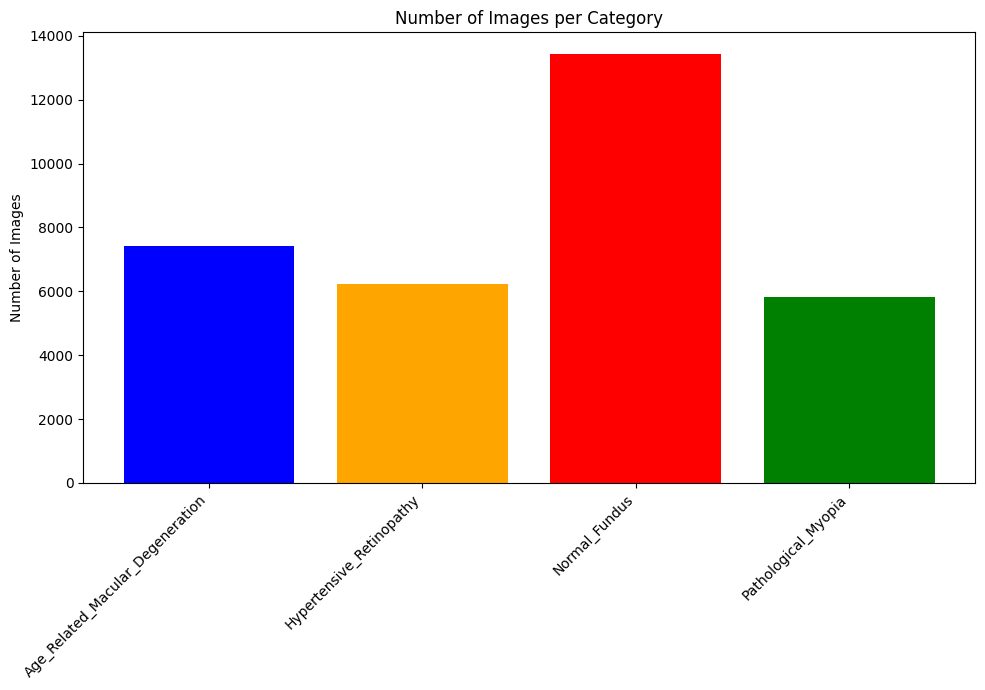

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the base directory where the zip files were extracted
extract_dir_base = 'dl-project-1/extracted_data' # This should match the extraction directory from the previous step

# List of the extracted directories (corresponding to the original zip files)
extracted_folders = [
    'Age_Related_Macular_Degeneration',
    'Hypertensive_Retinopathy',
    'Normal_Fundus',
    'Pathological_Myopia'
]

# Dictionary to store the count of files in each folder
folder_counts = {}

# Iterate through each extracted folder and count the files
for folder_name in extracted_folders:
    # Construct the path to the nested folder
    nested_folder_path = os.path.join(extract_dir_base, folder_name, folder_name) # Assuming the nested folder has the same name

    if os.path.exists(nested_folder_path):
        # Count files (excluding directories) in the nested folder
        file_count = len([f for f in os.listdir(nested_folder_path) if os.path.isfile(os.path.join(nested_folder_path, f))])
        folder_counts[folder_name] = file_count
        print(f"Count for '{folder_name}': {file_count}")
    else:
        print(f"Warning: Nested folder not found at {nested_folder_path}")
        folder_counts[folder_name] = 0 # Add with 0 count if folder not found


# Prepare data for the bar graph
labels = list(folder_counts.keys())
counts = list(folder_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'orange', 'red', 'green'])
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

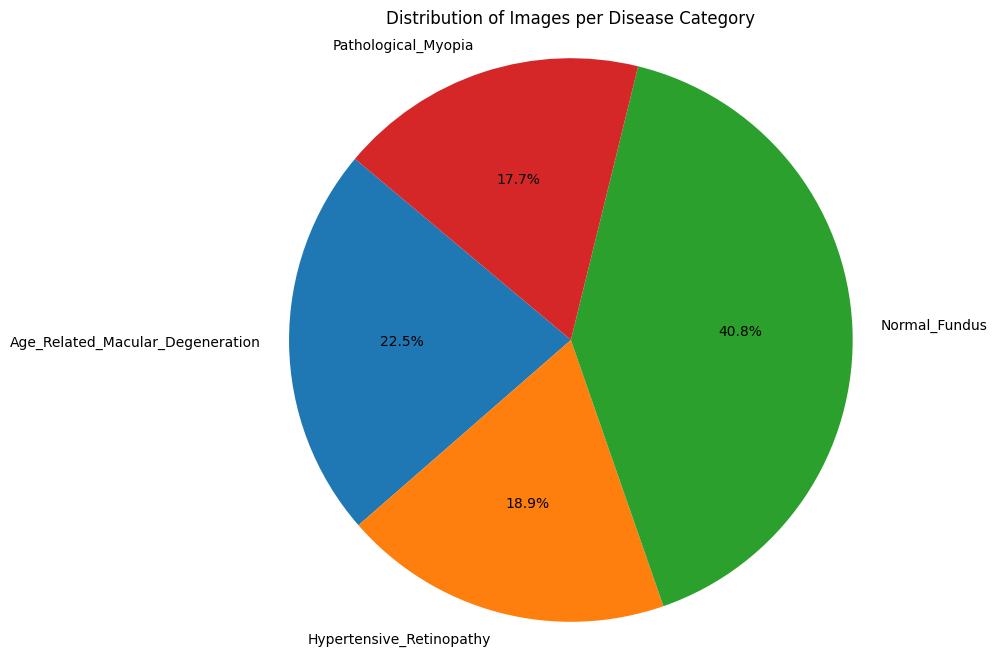

Number of images per disease category:
Age_Related_Macular_Degeneration: 7412
Hypertensive_Retinopathy: 6224
Normal_Fundus: 13438
Pathological_Myopia: 5833


In [ ]:
# Prepare data for the pie chart
pie_labels = list(folder_counts.keys())
pie_sizes = list(folder_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Disease Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# You can also print the counts for clarity
print("Number of images per disease category:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

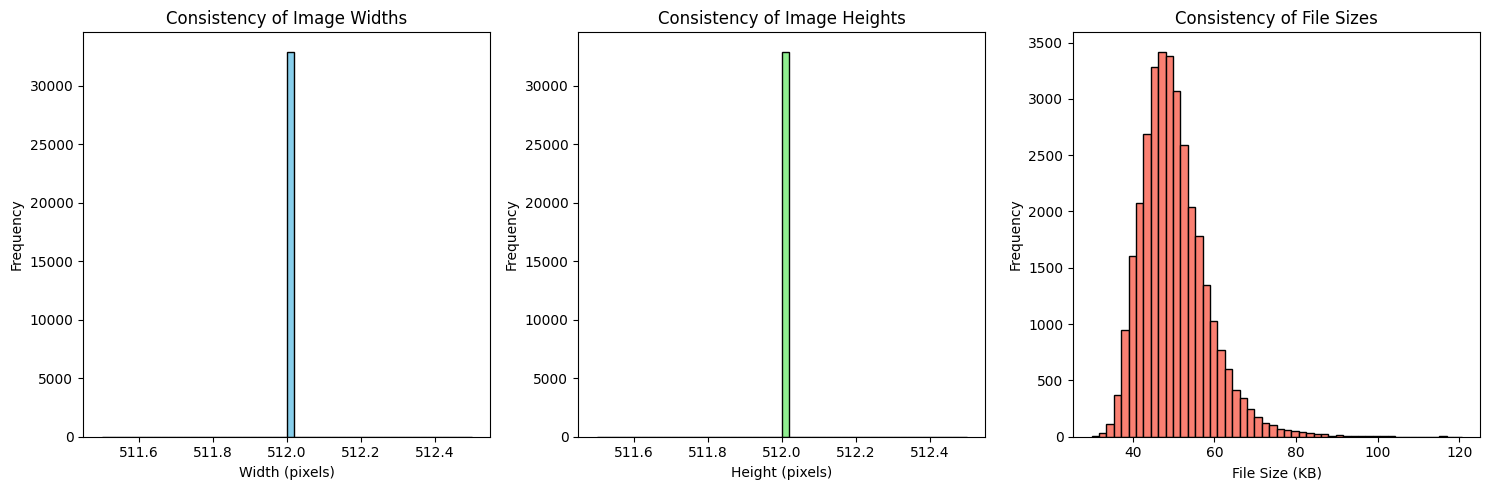

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store image attributes
resolutions = []
file_sizes = []

# Iterate through each extracted folder and collect attributes from images within the nested folder
for folder_name in extracted_folders:
    nested_folder_path = os.path.join(extract_dir_base, folder_name, folder_name) # Assuming the nested folder structure

    if os.path.exists(nested_folder_path):
        for filename in os.listdir(nested_folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                filepath = os.path.join(nested_folder_path, filename)

                # Get file size
                file_size_kb = os.path.getsize(filepath) / 1024  # in KB
                file_sizes.append(file_size_kb)

                try:
                    # Open image to get resolution
                    with Image.open(filepath) as img:
                        width, height = img.size
                        resolutions.append((width, height))
                except Exception as e:
                    print(f"Could not process image {filepath}: {e}")
    else:
        print(f"Warning: Nested folder not found for {folder_name} at {nested_folder_path}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes')

plt.tight_layout()
plt.show()

## Section 2.3: Preprocessing Steps
[Discuss any preprocessing steps applied (resizing, augmentation, annotation formats,
etc.)]

/content/dl-project-1/data/dl-project-1.v2i.yolov12


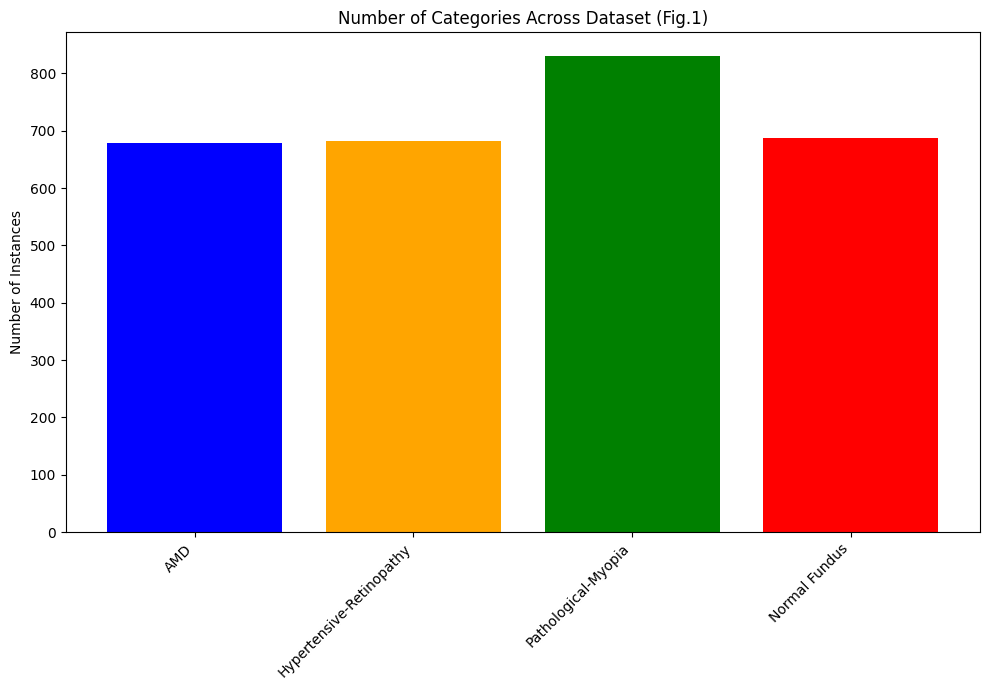

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Change to the directory containing the dataset folders
%cd /content/dl-project-1/data/dl-project-1.v2i.yolov12

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# Define the keywords to look for in image filenames for the other classes
amd_keyword = 'AMD'
hypertensive_keyword = 'Hypertensive-Retinopathy'
myopia_keyword = 'Pathological-Myopia'
normal_fundus_name = 'Normal Fundus'
other_class_keywords = [amd_keyword.lower(), hypertensive_keyword.lower(), myopia_keyword.lower()]

# Function to count images for the specific disease classes based on filename keywords
def count_disease_classes_by_filename(image_folder):
    class_counts = defaultdict(int)
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        if amd_keyword.lower() in filename_lower:
            class_counts[amd_keyword] += 1
        elif hypertensive_keyword.lower() in filename_lower:
            class_counts[hypertensive_keyword] += 1
        elif myopia_keyword.lower() in filename_lower:
            class_counts[myopia_keyword] += 1

    return class_counts

# Function to count Normal Fundus images based on the absence of other class keywords in filename
def count_normal_fundus_by_filename(image_folder):
    normal_fundus_count = 0
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        is_other_class = False
        for keyword in other_class_keywords:
            if keyword in filename_lower:
                is_other_class = True
                break
        if not is_other_class:
            normal_fundus_count += 1

    return normal_fundus_count


# Count classes in each split based on filenames
train_disease_counts = count_disease_classes_by_filename(train_images_path)
train_normal_fundus_count = count_normal_fundus_by_filename(train_images_path)

valid_disease_counts = count_disease_classes_by_filename(valid_images_path)
valid_normal_fundus_count = count_normal_fundus_by_filename(valid_images_path)

test_disease_counts = count_disease_classes_by_filename(test_images_path)
test_normal_fundus_count = count_normal_fundus_by_filename(test_images_path)


# Combine counts from all splits
total_class_counts = defaultdict(int)
all_class_names = [amd_keyword, hypertensive_keyword, myopia_keyword, normal_fundus_name]

# Sum disease counts
for class_name in [amd_keyword, hypertensive_keyword, myopia_keyword]:
    total_class_counts[class_name] = (
        train_disease_counts[class_name] +
        valid_disease_counts[class_name] +
        test_disease_counts[class_name]
    )

# Sum Normal Fundus counts
total_class_counts[normal_fundus_name] = (
    train_normal_fundus_count +
    valid_normal_fundus_count +
    test_normal_fundus_count
)


# Prepare data for the bar graph
labels = list(total_class_counts.keys())
counts = list(total_class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Number of Instances')
plt.title('Number of Categories Across Dataset (Fig.1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

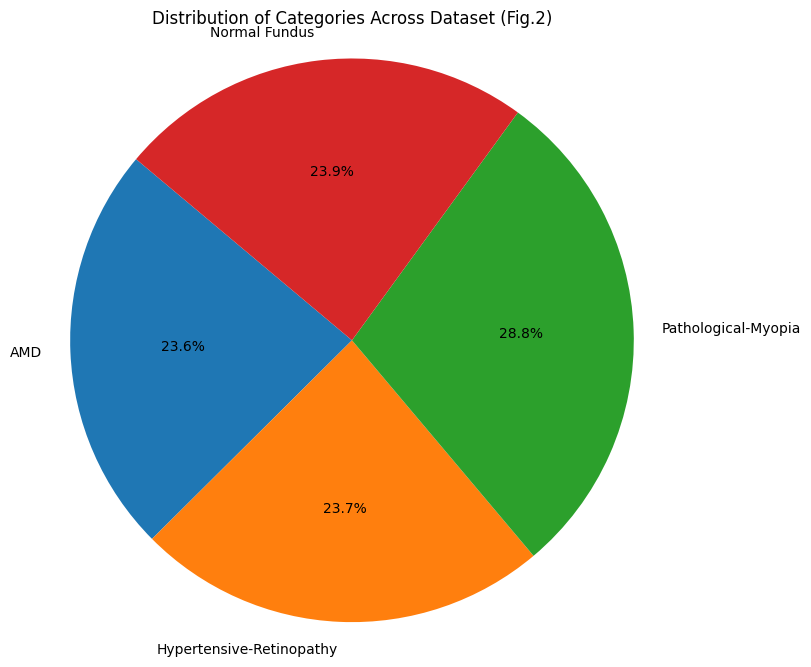

Total number of instances for each class:
AMD: 678
Hypertensive-Retinopathy: 682
Pathological-Myopia: 830
Normal Fundus: 688


In [ ]:
# Prepare data for the pie chart
pie_labels = list(total_class_counts.keys())
pie_sizes = list(total_class_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories Across Dataset (Fig.2)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print total number for each class
print("Total number of instances for each class:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

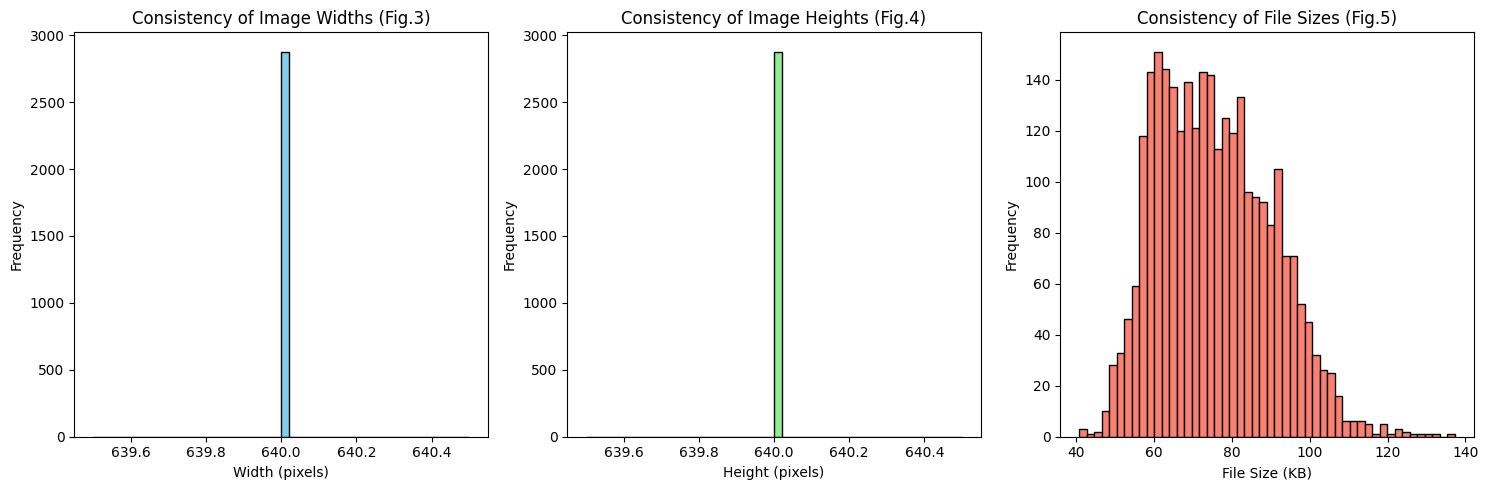

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# List of all image folders
image_folders = [train_images_path, valid_images_path, test_images_path]

# Initialize lists to store image attributes
resolutions = []
file_sizes = []
aspect_ratios = []

# Iterate through each image folder and collect attributes
for folder_path in image_folders:
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(folder_path, filename)

            # Get file size
            file_size_kb = os.path.getsize(filepath) / 1024  # in KB
            file_sizes.append(file_size_kb)

            try:
                # Open image to get resolution and calculate aspect ratio
                with Image.open(filepath) as img:
                    width, height = img.size
                    resolutions.append((width, height))
                    aspect_ratios.append(width / height)
            except Exception as e:
                print(f"Could not process image {filepath}: {e}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths (Fig.3)')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights (Fig.4)')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes (Fig.5)')

plt.tight_layout()
plt.show()


# Section 3: Requirements

[insert text]

## Section 3.1: Python Libraries Used

In [ ]:
# Clone the YOLOv12 repository
!git clone https://github.com/sunsmarterjie/yolov12.git

# Using helper variable to seperate the two github repos
my_repo = "dl-project-1"
yolov12_repo = "yolov12"

# Change to the cloned yolov12 directory
os.chdir(yolov12_repo)
%cd yolov12 # Move into the YOLOv12 repository directory

Cloning into 'yolov12'...
remote: Enumerating objects: 1163, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 1163 (delta 325), reused 297 (delta 296), pack-reused 680 (from 2)
Receiving objects: 100% (1163/1163), 1.81 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (581/581), done.
[Errno 2] No such file or directory: 'yolov12 # Move into the YOLOv12 repository directory'
/content/dl-project-1/data/dl-project-1.v2i.yolov12


In [ ]:
# Install project dependencies and overwrite requirements.txt with fixed versions to ensure compatibility in Colab.
%%writefile requirements.txt
torch==2.2.2
torchvision==0.17.2
timm==1.0.14
albumentations==2.0.4
pycocotools==2.0.7
PyYAML==6.0.1
scipy==1.13.0
onnxslim==0.1.31
onnxruntime-gpu==1.18.0
gradio==4.44.1
opencv-python==4.9.0.80
psutil==5.9.8
py-cpuinfo==9.0.0
huggingface-hub==0.23.2
safetensors==0.4.3
numpy==1.26.4
supervision==0.22.0

Overwriting requirements.txt


In [ ]:
# Ensures smooth installation of dependencies and prevents build errors.
!pip install -r requirements.txt
!pip install -U pip setuptools wheel
!pip install --only-binary=:all: "onnx==1.16.2" # This avoids compilation errors in Colab by forcing a wheel install.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 791.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 40.5 MB/s 

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 103.0 MB/s  0:00:00
  Attempting uninstall: onnx
    Found existing installation: onnx 1.19.1
    Uninstalling onnx-1.19.1:
      Successfully uninstalled onnx-1.19.1


In [ ]:
# Change directory to the YOLOv12 repository inside my project folder
os.chdir(my_repo)
%cd

# Section 4: Model Training

[Describe the model architecture and training pipeline.]

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/RetinaVision_YOLOv12

# Do not uncomment to avoid recloning!
# !git clone https://github.com/sunsmarterjie/yolov12.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/RetinaVision_YOLOv12


In [2]:
%cd yolov12

/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12


In [ ]:
# uncomment if requirements.txt not found
# %%writefile requirements.txt
# torch==2.2.2
# torchvision==0.17.2
# timm==1.0.14
# albumentations==2.0.4
# pycocotools==2.0.7
# PyYAML==6.0.1
# scipy==1.13.0
# onnxslim==0.1.31
# onnxruntime-gpu==1.18.0
# gradio==4.44.1
# opencv-python==4.9.0.80
# psutil==5.9.8
# py-cpuinfo==9.0.0
# huggingface-hub==0.23.2
# safetensors==0.4.3
# numpy==1.26.4
# supervision==0.22.0

Overwriting requirements.txt


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 44.3 MB/s e

In [3]:
!pip install -U pip setuptools wheel

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install --only-binary=:all: "onnx==1.16.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.7 MB/s  0:00:00
  Attempting uninstall: onnx
    Found existing installation: onnx 1.19.1
    Uninstalling onnx-1.19.1:
      Successfully uninstalled onnx-1.19.1


In [3]:
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12

/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12


In [5]:
!pip uninstall -y flash-attn flash_attn

In [6]:
!pip install --no-cache-dir --force-reinstall "flash-attn==2.6.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.4 MB/s  0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 255.3 MB/s  0:00:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 173.5 MB/s  0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 318.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 228.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 163.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 68.1 MB/s  0:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 206.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 189.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 301.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 278.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 217.7 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12

/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12


In [5]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/RetinaVision_YOLOv12/yolov12
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached torch-2.2.2-cp312-cp312-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.meta

In [6]:
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12

/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12


In [7]:
!pip install -U ultralytics==8.3.176

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s  0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.63
    Uninstalling ultralytics-8.3.63:
      Successfully uninstalled ultralytics-8.3.63


In [8]:
!wget https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-seg.pt

--2025-10-24 14:49:30--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-seg.pt
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/74bee05a-9e86-48b4-b611-b3204f4d9349?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-24T15%3A43%3A31Z&rscd=attachment%3B+filename%3Dyolo11n-seg.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-24T14%3A43%3A20Z&ske=2025-10-24T15%3A43%3A31Z&sks=b&skv=2018-11-09&sig=7QEPRK1yekaWrOs68cCYByKfklxIVcG5bTI07LcSoqs%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MTMxNzY3MCwibmJmIjoxNzYxMzE3MzcwLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9

## Section 4.1: Training Hyperparameters

[Show training hyperparameters (learning rate, batch size, epochs).]

In [ ]:
# Clone the GitHub repository where the dataset is stored
# !rm -rf dl-project-1
# !git clone https://github.com/NeoRedcraft/dl-project-1
# Define the path to the cloned repository
# repo_path = 'dl-project-1/data/dl-project-1.v2i.yolov12'


Cloning into 'dl-project-1'...
remote: Enumerating objects: 5829, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 5829 (delta 18), reused 19 (delta 3), pack-reused 5780 (from 2)
Receiving objects: 100% (5829/5829), 215.67 MiB | 7.20 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (5769/5769), done.
Filtering content: 100% (4/4), 1.57 GiB | 30.63 MiB/s, done.
fatal: cannot exec '/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/.git/hooks/post-checkout': Permission denied


In [9]:
!pip uninstall -y flash-attn flash_attn

!pip install torch==2.2.2 torchvision==0.17.2

Found existing installation: flash-attn 2.6.3
Uninstalling flash-attn-2.6.3:
  Successfully uninstalled flash-attn-2.6.3


In [10]:
# Just here to check if file updated
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12 # Best mAP score of
%ls


[Errno 2] No such file or directory: '/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12 # Best mAP score of'
/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12
 ai2project/                                 Test.v1i.yolov12.zip
 app.py                                      Test.v2i.yolov12/
 assets/                                     ultralytics/
 dl-project-1/                               ultralytics.egg-info/
 docker/                                     YOLO11/
 examples/                                   yolo11n-seg.pt
'Fundus detection.v3i.yolov12'/              yolo11n-seg.pt.1
'Fundus detection.v4-newdatav2.2.yolov12'/   yolo11n-seg.pt.10
'Fundus detection.v5i.yolov12'/             'yolo11n-seg.pt.1 (1)'
 LICENSE                                     yolo11n-seg.pt.11
 logs/                                       yolo11n-seg.pt.2
 mkdocs.yml                                  yolo11n-seg.pt.3
 pyproject.toml                              yolo11n-seg.pt.4
 README.md  

In [ ]:
# Created to double check the dataset in use
import os
from collections import defaultdict
# Paths
dataset_root = '/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12'#Fundus detection.v5i.yolov12
splits = ['train', 'valid', 'test']
class_names = ['AMD', 'Cataract', 'Pathological_Myopia']

total_image_counts = defaultdict(int)

for split in splits:
    label_dir = os.path.join(dataset_root, split, 'labels')
    class_image_counts = defaultdict(int)

    if not os.path.exists(label_dir):
        print(f"⚠️ No label folder found for {split}")
        continue

    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            class_ids_in_image = set()
            with open(os.path.join(label_dir, file), 'r') as f:
                for line in f:
                    class_id = int(line.strip().split()[0])
                    class_ids_in_image.add(class_id)
            for cid in class_ids_in_image:
                class_image_counts[cid] += 1
                total_image_counts[cid] += 1

    print(f"\n{split.upper()} SET:")
    for i, name in enumerate(class_names):
        print(f"  {name:<20}: {class_image_counts[i]} images")

print("\nTOTAL IMAGES PER CLASS (ALL SPLITS):")
for i, name in enumerate(class_names):
    print(f"  {name:<20}: {total_image_counts[i]} images")

#Record of dataset splits
#--------------------------------------------------------------------
# dataset_root = '/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12'
# TRAIN SET:
#   AMD                 : 1017 images
#   Cataract            : 995 images
#   Pathological_Myopia : 793 images

# VALID SET:
#   AMD                 : 137 images
#   Cataract            : 110 images
#   Pathological_Myopia : 103 images

# TEST SET:
#   AMD                 : 122 images
#   Cataract            : 119 images
#   Pathological_Myopia : 109 images

# TOTAL IMAGES PER CLASS (ALL SPLITS):
#   AMD                 : 1276 images
#   Cataract            : 1224 images
#   Pathological_Myopia : 1005 images
#------------------------------------

In [ ]:
# Run and will resume last segment!!!!!!
# This is GPU SETUP!

#--------------------------------------------------------------------
# from ultralytics import YOLO

# model = YOLO('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_backup_Fri_2025-10-24_03-33/weights/last.pt')

# results = model.train(
#     data='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12/data.yaml',
#     epochs=1000,
#     batch=8,
#     patience=20,
#     imgsz=800,
#     lr0=0.005,
#     scale=0.2,
#     mosaic=0.5,
#     mixup=0.0,
#     copy_paste=0.1,
#     close_mosaic=20,
#     weight_decay=0.0005,
#     device="0",
#     save=True,
#     project='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment',
#     resume=True,
# )

New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.2.2+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt, data=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/data.yaml, epochs=1000, time=None, patience=15, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, va

train: Scanning /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/train/labels.cache... 2517 images, 36 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels.cache... 181 images, 1 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<?, ?it/s]

Plotting labels to /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Resuming training /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt from epoch 2 to 1000 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     2/1000         0G      1.965       3.77       2.85      1.876         48        640:   1%|          | 2/315 [00:26<1:07:58, 13.03s/it]


KeyboardInterrupt: 

In [ ]:
# Run a NEW segment!!!!!!
# This is GPU SETUP!

#--------------------------------------------------------------------
# from ultralytics import YOLO
# from datetime import datetime

# model = YOLO('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/yolo11n-seg.pt')

# results = model.train(
#     data='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12/data.yaml',
#     epochs=1000,
#     batch=8,
#     patience=20,
#     imgsz=800,
#     lr0=0.005,
#     scale=0.2,
#     mosaic=0.5,
#     mixup=0.0,
#     copy_paste=0.1,
#     close_mosaic=20,
#     weight_decay=0.0005,
#     device="0",
#     save=True,
#     project='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment',
#     name=f"train_newDataSet_{datetime.now().strftime('%a_%Y-%m-%d_%H-%M')}"
# )

In [ ]:
#Create backup of segments

#--------------------------------------------------------------------

# import shutil
# src = '/content/drive/MyDrive/' # name and location of what to copy
# dst = '/content/drive/MyDrive/' # name and location of new copy
# shutil.copytree(src, dst)
# print(f"✅ Backup created at: {dst}")

## Section 4.2: Performance Metrics

[Report performance metrics (mAP, IoU, precision, recall)]

## Section 4.3: Model Checkpoints

[Save and document model checkpoints]

# Section 5: Model Testing (Unseen Data)

[Explain your train/val/test split strategy. ]

In [ ]:
# Creates a predict folder
# model.predict(
#     source="/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12/valid/images",
#     save=True,
#     save_txt=True,        # <— this saves .txt labels for each image
#     save_conf=True,       # <— this adds confidence values to those .txt files
#     project="runs/predict", # Custom output folder
#     name="Test.v2i.yolov12_prediction_2"         # Subfolder name
# )

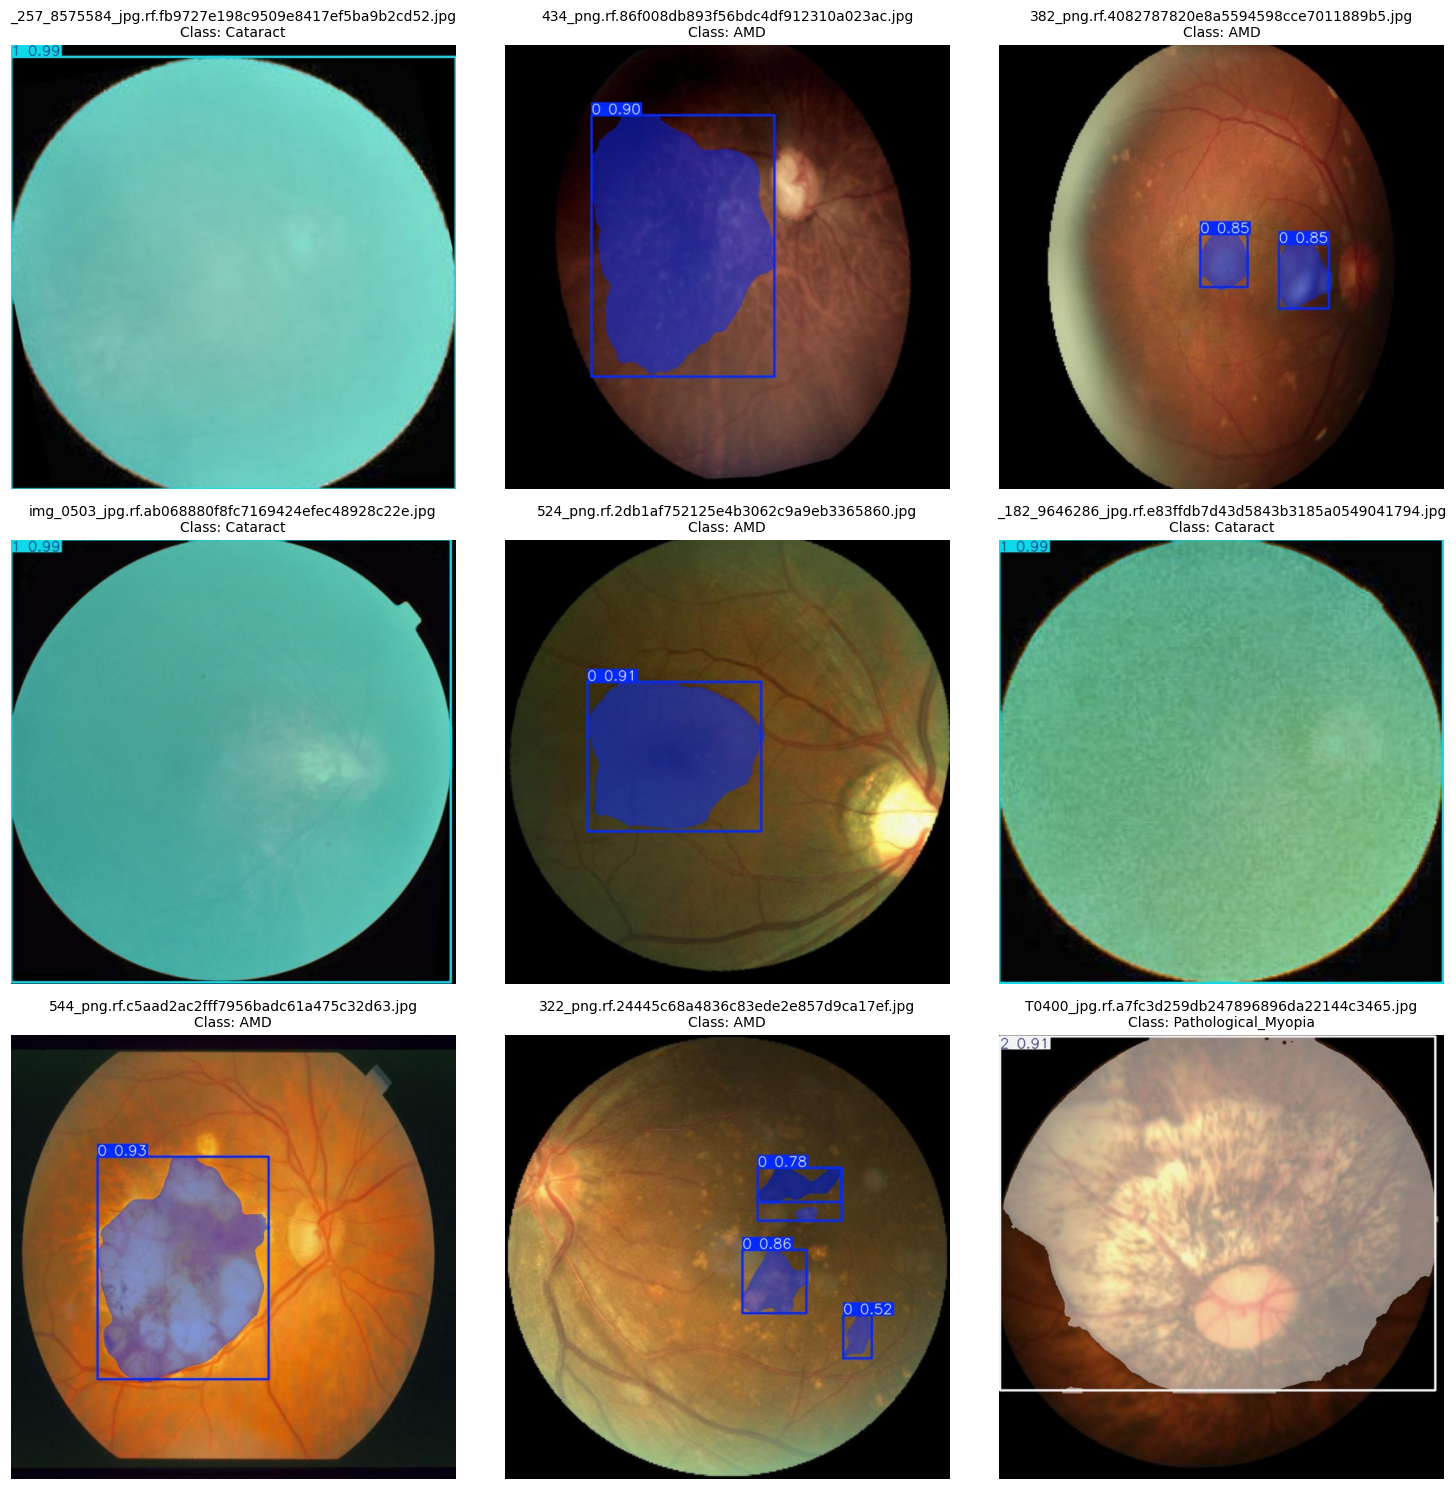

In [11]:
import os
import cv2
import random
import math
import matplotlib.pyplot as plt

# --- Paths ---
pred_folder = "/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/Test.v2i.yolov12/runs/predict/Test.v2i.yolov12_prediction_2"
labels_folder = os.path.join(pred_folder, "labels")

if not os.path.exists(pred_folder):
    raise FileNotFoundError(f"Prediction folder not found: {pred_folder}")
if not os.path.exists(labels_folder):
    print(f"Warning: Labels folder does not exist: {labels_folder}")

# --- Class names ---
class_names = ['AMD', 'Cataract', 'Pathological_Myopia']

# --- Get image files and sample ---
image_files = [f for f in os.listdir(pred_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
if not image_files:
    raise FileNotFoundError(f"No image files found in {pred_folder}")

sample_files = random.sample(image_files, min(9, len(image_files)))

# --- Grid settings ---
cols = 3
rows = math.ceil(len(sample_files) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

# --- Process each sample ---
for i, img_name in enumerate(sample_files):
    img_path = os.path.join(pred_folder, img_name)
    label_path = os.path.join(labels_folder, os.path.splitext(img_name)[0] + ".txt")

    # Read image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not read image {img_name}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    class_name = "No detections"
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()
            if lines:
                first_line = lines[0].strip().split()
                cls = int(first_line[0])
                class_name = class_names[cls]

    axes[i].imshow(img)
    axes[i].set_title(f"{img_name}\nClass: {class_name}", fontsize=10)
    axes[i].axis("off")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


## Section 5.1: Performance Metrics on Test set

[Report final metrics on this held-out test set (e.g., mAP@.5:.95, IoU,
precision/recall per class),]

## Section 5.2: Example of Dectections and Segmentations

[ present visual examples of detections/segmentations. Discuss
generalization, failure cases, and how results differ from validation.]

# Section 6: Web Deployment

[About the deployment]

## 6.1: Streamlit Guide

In [ ]:
# insert

### 6.1.1: User Uploded Image and Run Interface

In [ ]:
# insert

### 6.1.2: Display Detection and Segmentation Results

In [ ]:
# insert

# Section 7: Results and Analysis

[Overall Performance]

## Section 7.1: Quantative Results and Analysis

[metrics - Discuss strengths, weaknesses, and edge cases.]

In [ ]:
#insert

## Section 7.2: Qualitative Results and Analysis

[visual examples - Discuss strengths, weaknesses, and edge cases.]

In [ ]:
#insert

# Section 8 Documentation

[IEEE Paper]

## Section 8.1: Abstract

## Section 8.2: Introduction

## Section 8.3: Methodology
[dataset, model, training, deployment]

## Section 8.4: Results and Discussion

## Section 8.5: Conclusion and Future Work

## Section 8.6: References
[IEEE style]

# Section 9: Insights and conclusion

[Summarize what your group learned about building an computer vision system. Discuss the
strengths and limitations and suggest areas for future improvement.]

# Section 10: References

[Cite relevant references that you used in your project. All references must be cited, including:]

## Section 10.1: Scholarly Articles
[Cite in APA format, and put a description of how you used it for your work.]

## Section 10.2: Online References
[Put the website, blog, or article title, link, and how you incorporated it into your
work]

## Section 10.3: Artifical Intelligence Tools
[Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your
conversations with the model (including your prompts and its responses), and a
description of how you used it for your work.]